In [1]:
import garpar as gp
import itertools as it
import numpy as np
import joblib as jb
import tqdm.notebook
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

## Parámetros de la Levy desde una muestra aleatoria

In [2]:
x = scipy.stats.levy_stable.rvs(alpha=2.0, beta=-0.0126, loc=0.0005, scale=0.005, size=100)
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(x)
alpha1, beta1, loc1, scale1


(1.9999991675203226,
 0.06311508113646408,
 -5.181201198720608e-05,
 0.00465418854334051)

## Parámetros de Levy desde un año de Mercado Valores Argentino 

In [3]:
merval21 = gp.datasets.load_MERVAL(
    first="01-02-2021", last = "31-12-2021")
merval21 = merval21.as_returns()
merval21

/home/nadia/simulacion/lib/python3.9/site-packages/garpar/datasets/data/__init__.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  first, last = pd.to_datetime(first), pd.to_datetime(last)


Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.056995,-0.014122,-0.003331,0.039242,0.004132,0.027451,0.020047,-0.012456,0.003245,0.016598,...,0.028148,0.006873,0.046358,-0.001789,0.021505,0.076503,0.000000,0.000000,-0.010889,-0.006061
2021-01-06,0.035294,-0.012325,0.008354,-0.026042,0.008230,0.013740,0.035838,-0.007207,-0.004852,0.016327,...,0.011527,-0.010239,-0.006329,-0.017921,-0.026316,0.000000,0.015385,0.008475,0.023853,0.006098
2021-01-07,0.005682,-0.015514,-0.000829,-0.005348,-0.004082,0.038404,0.001116,-0.014519,0.006908,-0.006024,...,0.001425,-0.006897,0.054140,0.000000,0.000000,0.000000,0.030303,0.000000,0.109319,-0.012121
2021-01-08,0.005650,-0.002398,-0.000829,-0.013441,-0.012295,-0.015228,-0.125975,-0.009208,-0.010089,-0.004040,...,-0.001422,0.005787,-0.012085,-0.023723,-0.005405,0.000000,-0.011029,0.008403,-0.046850,-0.053170
2021-01-11,0.007491,-0.050137,-0.004149,-0.016349,-0.004149,0.002946,-0.019133,-0.040892,-0.019568,-0.012170,...,-0.027066,-0.016110,-0.024465,-0.009346,0.000000,-0.005076,-0.011152,0.008333,0.033898,0.010799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.024202,0.020322,0.031205,0.029366,0.001681,0.000996,0.021193,0.024510,0.003778,0.004280,...,0.016570,0.012295,-0.024922,0.048493,0.056319,0.000000,-0.006579,-0.001786,0.005025,0.008021
2021-12-27,-0.008593,0.019689,-0.017691,-0.010511,0.028523,-0.056716,-0.039969,0.029665,0.004266,-0.036932,...,0.029956,0.000000,0.012780,0.018750,-0.016905,-0.024299,0.000000,0.016100,0.000000,-0.013263
2021-12-28,-0.050921,-0.049394,-0.032227,-0.042489,0.001631,0.007911,-0.013611,-0.036245,-0.034733,-0.022124,...,0.028229,0.004049,0.000000,-0.019632,-0.010582,-0.007663,0.000000,-0.019366,0.001667,0.008065


In [4]:
y21 = merval21.mean(axis = 0, skipna = True)
y21

Stocks
ALUA     0.003034
BBAR     0.002111
BYMA     0.002487
CEPU     0.002874
COME     0.004394
CRES     0.002372
CVH      0.001886
EDN      0.003411
GGAL     0.002302
HARG     0.001710
MIRG     0.003881
PAMP     0.003631
SUPV     0.001665
TECO2    0.000576
TGNO4    0.003871
TGSU2    0.001023
TRAN     0.002961
TXAR     0.004134
YPFD     0.001129
AGRO     0.003768
AUSO     0.002325
BHIP    -0.000061
BOLT     0.000204
BPAT     0.000955
CADO     0.001365
CELU     0.000092
CGPA2    0.003669
DGCU2    0.003301
DYCA     0.002574
FERR     0.001701
FIPL     0.003082
GARO     0.004311
GBAN     0.003884
GCLA     0.005292
GRIM     0.005866
HAVA     0.001192
INVJ     0.000855
IRCP    -0.000682
IRSA     0.001648
LEDE     0.003289
LONG     0.001845
METR     0.003418
MOLA     0.002690
MOLI     0.001669
MORI     0.000382
OEST     0.001820
PATA     0.000346
POLL     0.005035
RIGO     0.000950
SAMI     0.001134
SEMI     0.000623
TGLT    -0.000923
dtype: float64

In [5]:
y21 = merval21.mean(axis = 0, skipna = True) 
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(y21)
alpha1, beta1, loc1, scale1

(2.0, 1.0, 0.0022513892259879527, 0.001210912700436551)

In [27]:
# definimos los sectores 
come = ["AUSO", "BOLT", "DYCA","GCLA", "IRCP", "IRSA", "OEST", "PATA", "POLL","TECO2","CVH"] 
moa = ["CELU", "GRIM", "HAVA", "LEDE", "MOLA", "MOLI", "MORI", "SAMI", "SEMI"] #"INTR"
moi = ["AGRO", "ALUA",  "FERR", "LONG", "RIGO", "HARG", "FIPL"] # "ROSE", "LOMA", "CAPU","MIRG","TXAR "
agro = ["CADO", "GARO", "INVJ","CRES"] #"ESME"
ene = ["CEPU", "CGPA2", "DGCU2", "GBAN", "METR", "TGNO4", "TGSU2", "YPFD", "PAMP","TRAN","COME","EDN","GBAN" ]  #"CARC",
fin = ["BHIP", "BPAT",  "BYMA", "GGAL", "SUPV", "BBAR"] #"BMA", "VALO", "BRIO","BRIO6",

In [7]:
y21scome = merval21[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scome)
alpha_come, beta_come, loc_come, scale_come 

(1.8190316218403773,
 0.4503142299590916,
 0.0021742929768565605,
 0.00834763566037715)

In [8]:
scipy.stats.ks_1samp(x=y21scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

KstestResult(statistic=0.025461714825871007, pvalue=0.9967036546261379, statistic_location=0.010164345043233804, statistic_sign=1)

In [9]:
y21smoa = merval21[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y21smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.9999999999999991,
 -0.9999999999999998,
 0.0021527853033436115,
 0.007323718974539857)

In [10]:
scipy.stats.ks_1samp(x=y21smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

KstestResult(statistic=0.052755722594221455, pvalue=0.49962670806675147, statistic_location=0.010466055474004933, statistic_sign=1)

In [15]:
y21smoi = merval21[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y21smoi)
alphamoi, betamoi, locmoi, scalemoi

(2.0, 1.0, 0.002861928175619074, 0.00888794710133814)

In [16]:
scipy.stats.ks_1samp(x=y21smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

KstestResult(statistic=0.03591666575291125, pvalue=0.9050647533708039, statistic_location=-0.006053012350894235, statistic_sign=1)

In [19]:
y21sagro = merval21[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y21sagro)
alphaagro, betaagro, locagro, scaleagro

(1.7918750041895795,
 0.23881535080290872,
 0.002009024615225637,
 0.009778580052196851)

In [20]:
scipy.stats.ks_1samp(x=y21sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

KstestResult(statistic=0.039353973656518826, pvalue=0.8367294853450916, statistic_location=0.0020767034590011, statistic_sign=-1)

In [23]:
y21sene = merval21[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y21sene)
alphaene, betaene, locene, scaleene

(1.7421799494474097,
 0.4759121392451602,
 0.0035093258371752126,
 0.011599771620047423)

In [24]:
scipy.stats.ks_1samp(x=y21sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

KstestResult(statistic=0.03572499502454479, pvalue=0.9083627613731279, statistic_location=-0.010949555441387785, statistic_sign=-1)

In [28]:
y21sfin = merval21[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y21sfin)
alphafin, betafin, locfin, scalefin

(1.8630914086054906,
 0.3745869387265307,
 0.0017691490461231897,
 0.012737154151075864)

In [30]:
scipy.stats.ks_1samp(x=y21sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

KstestResult(statistic=0.04049794063373313, pvalue=0.8107162618149142, statistic_location=-0.0035419046569829526, statistic_sign=1)

In [31]:
y21s = merval21.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y21s)
alphat, betat, loct, scalet

(1.8128170393712963,
 0.3392396471308702,
 0.002412045077898315,
 0.007927153418948544)

In [32]:
scipy.stats.ks_1samp(x=y21s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))

KstestResult(statistic=0.03837006964829409, pvalue=0.8579258105755009, statistic_location=-0.002157593522697817, statistic_sign=1)

Text(0.5, 1.0, '2021')

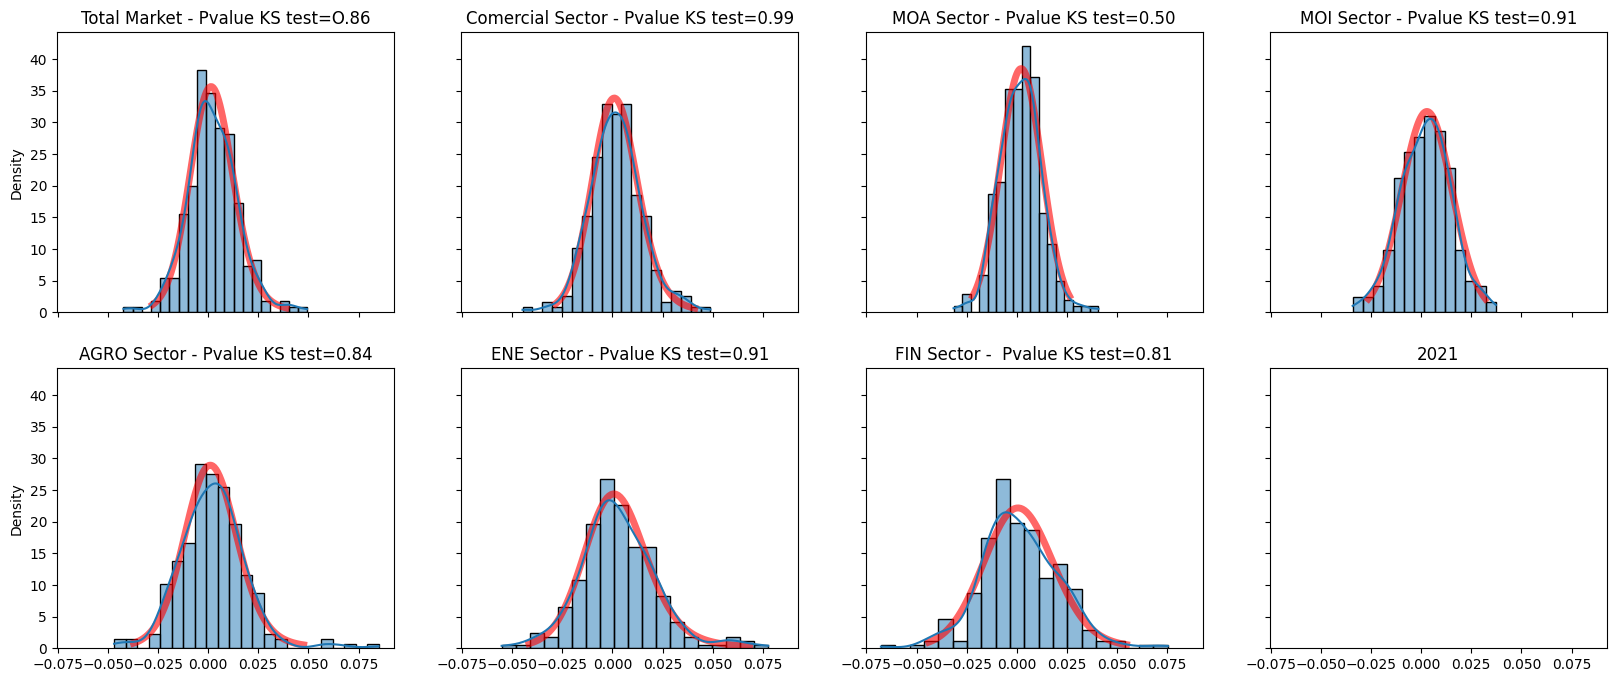

In [34]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y21s,stat = "density",kde=True)
ax[0,0].set_title("Total Market - Pvalue KS test=O.86")
#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y21scome, stat = "density",kde=True)
ax[0,1].set_title("Comercial Sector - Pvalue KS test=0.99")
#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y21smoa, stat = "density",kde=True)
ax[0,2].set_title("MOA Sector - Pvalue KS test=0.50")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y21smoi, stat = "density",kde=True)
ax[0,3].set_title("MOI Sector - Pvalue KS test=0.91" )
#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y21sagro, stat = "density",kde=True)
ax[1,0].set_title("AGRO Sector - Pvalue KS test=0.84")
#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y21sene, stat = "density",kde=True)
ax[1,1].set_title("ENE Sector - Pvalue KS test=0.91")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y21sfin, stat = "density",kde=True)
ax[1,2].set_title("FIN Sector -  Pvalue KS test=0.81")
ax[1,3].set_title("2021")


# blue line is empirical data and red line is teorical data of the goodness fit

Año 21    | Total                | Comercial              | MOA                   | MOI                     | AGRO                    | ENE                     | FIN                     |
|-------|------------------------|------------------------|-----------------------|-------------------------|-------------------------|-------------------------|-------------------------|
| alpha | 1.8128170393712963     | 1.7808811279069312     | 1.9999999999999991    | 1.949136710901894       |1.7596575607314175       |1.7053902636562444       |1.7153474968904008       |
| beta  | 0.3392396471308702     | 0.3534688249115768     | -0.9999999999999998   |  0.5278039611512102     |0.31821908297498924      |0.7742516124473384       |0.431775605826474        |
| loc   |0.002412045077898315    | 0.0023534096696979723  | 0.0021527853033436115 |  0.0021583577265823204  | 0.0018117626731931988   |0.0040621444390737185    |0.0007622504126380711    |
| scale | 0.007927153418948544   |  0.008182377166796722  | 0.007323718974539857  | 0.009352974587930479    | 0.008511457165211928    |0.012050605736389379     |0.008937680565895539     |


In [35]:
merval20 = gp.datasets.load_MERVAL(
    first="01-02-2020", last = "12-31-2020")
merval20 = merval20.as_returns()



/home/nadia/simulacion/lib/python3.9/site-packages/garpar/datasets/data/__init__.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  first, last = pd.to_datetime(first), pd.to_datetime(last)


In [36]:
y20scome = merval20[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y20scome)
alpha_come, beta_come, loc_come, scale_come 

(1.606068031148807,
 -0.014170674070088764,
 0.001753196459273034,
 0.010583759011642931)

In [44]:
scipy.stats.ks_1samp(x=y20scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

KstestResult(statistic=0.032354251263514044, pvalue=0.9561381896681697, statistic_location=0.0003141795446120527, statistic_sign=1)

In [37]:
y20smoa = merval20[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y20smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.6336213658969079,
 0.10465851852609709,
 0.00235355697136074,
 0.011398936158531634)

In [45]:
scipy.stats.ks_1samp(x=y20smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

KstestResult(statistic=0.06427058628694104, pvalue=0.2632338384016789, statistic_location=0.008727503573810826, statistic_sign=1)

In [38]:
y20smoi = merval20[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y20smoi)
alphamoi, betamoi, locmoi, scalemoi

(1.5808367627500926,
 0.002182026030197981,
 0.0027609914354161953,
 0.012575073539409051)

In [46]:
scipy.stats.ks_1samp(x=y20smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

KstestResult(statistic=0.0442250735326723, pvalue=0.7186439110461158, statistic_location=-0.0060312159456212345, statistic_sign=-1)

In [39]:
y20sagro = merval20[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y20sagro)
alphaagro, betaagro, locagro, scaleagro

(1.7496693176169114,
 -0.08066739760286218,
 0.001550030936456154,
 0.01250457103981547)

In [47]:
scipy.stats.ks_1samp(x=y20sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

KstestResult(statistic=0.036160714440181874, pvalue=0.9007801625171521, statistic_location=0.009072722683097528, statistic_sign=1)

In [40]:
y20sene = merval20[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y20sene)
alphaene, betaene, locene, scaleene

(1.6522562056310057,
 -0.3819425699068364,
 0.0003959930750143712,
 0.015137920473089511)

In [48]:
scipy.stats.ks_1samp(x=y20sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

KstestResult(statistic=0.040679053961263534, pvalue=0.8064778452109039, statistic_location=-0.008112325459433403, statistic_sign=-1)

In [41]:
y20sfin = merval20[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y20sfin)
alphafin, betafin, locfin, scalefin

(1.7447137945415714,
 0.02145802928454803,
 0.0020913010321036074,
 0.02141882431093402)

In [49]:
scipy.stats.ks_1samp(x=y20sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

KstestResult(statistic=0.03978483786740883, pvalue=0.8270929662042023, statistic_location=0.00368311758451619, statistic_sign=1)

In [42]:
y20s = merval20.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y20s)
alphat, betat, loct, scalet

(1.6235740841618886,
 -0.27653155791915995,
 0.0016505751444473877,
 0.012041680224817433)

In [50]:
scipy.stats.ks_1samp(x=y20s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))

KstestResult(statistic=0.04252584264437512, pvalue=0.7617126139409083, statistic_location=-0.01061750902297504, statistic_sign=-1)

Text(0.5, 1.0, '2020')

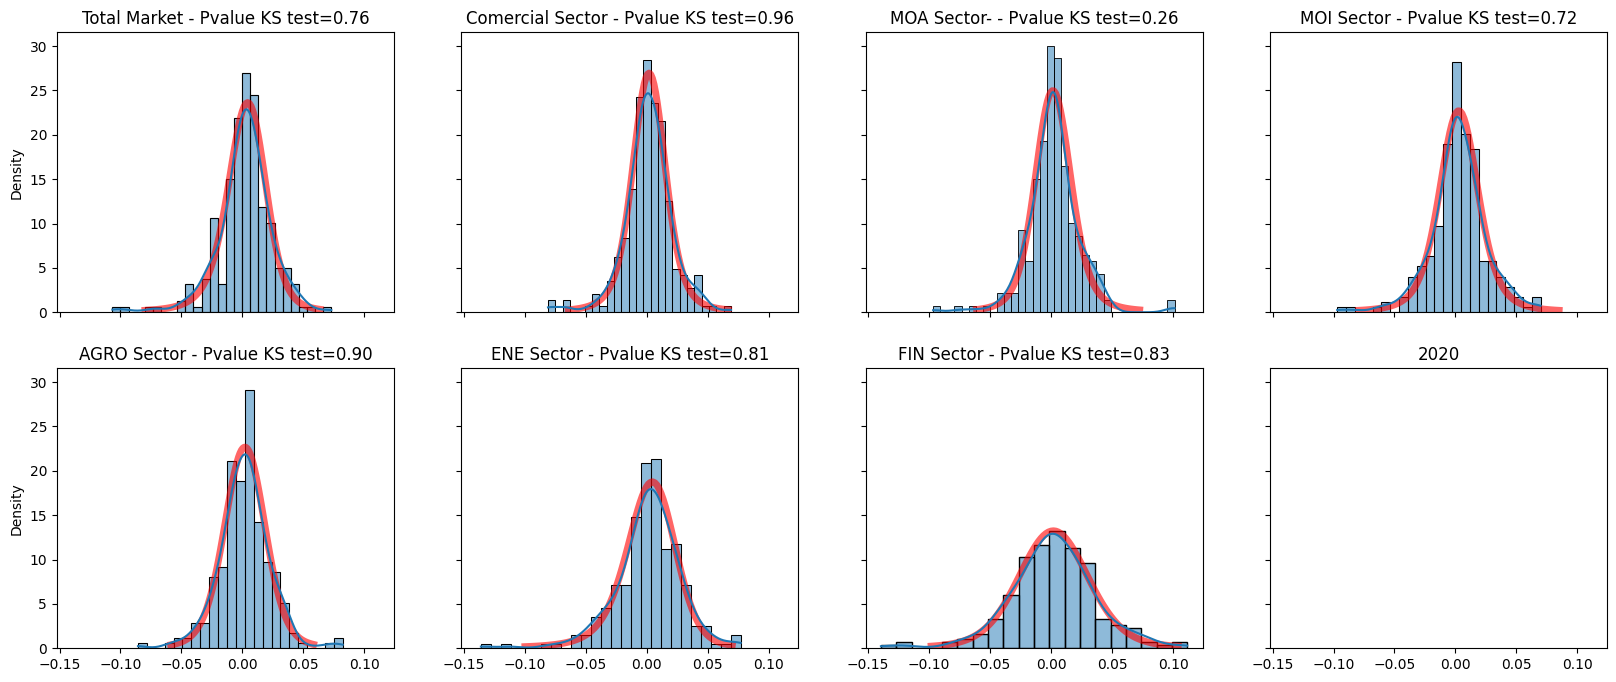

In [53]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y20s,stat = "density",kde=True)
ax[0,0].set_title("Total Market - Pvalue KS test=0.76")
#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y20scome,stat = "density",kde=True)
ax[0,1].set_title("Comercial Sector - Pvalue KS test=0.96")
#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y20smoa,stat = "density",kde=True)
ax[0,2].set_title("MOA Sector- - Pvalue KS test=0.26")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y20smoi,stat = "density",kde=True)
ax[0,3].set_title("MOI Sector - Pvalue KS test=0.72")
#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y20sagro,stat = "density",kde=True)
ax[1,0].set_title("AGRO Sector - Pvalue KS test=0.90")
#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y20sene,stat = "density",kde=True)
ax[1,1].set_title("ENE Sector - Pvalue KS test=0.81")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y20sfin,stat = "density",kde=True)
ax[1,2].set_title("FIN Sector - Pvalue KS test=0.83")
ax[1,3].set_title("2020")


# blue line is empirical data and red line is teorical data of the goodness fit

In [69]:
merval19 = gp.datasets.load_MERVAL(
    first="01-02-2019", last = "12-31-2019")
merval19 = merval19.as_returns()


In [56]:
y19scome = merval19[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y19scome)
alpha_come, beta_come, loc_come, scale_come 

(1.541436041385034,
 0.23619494050965273,
 0.0021811007653783853,
 0.008958753067999689)

In [57]:
scipy.stats.ks_1samp(x=y19scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

KstestResult(statistic=0.045200114684171955, pvalue=0.686202045002805, statistic_location=0.0020837688817392937, statistic_sign=1)

In [60]:
y19smoa = merval19[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y19smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.4172421773009216,
 0.21966925676810983,
 0.0035349054652199434,
 0.00919807373325213)

In [61]:
scipy.stats.ks_1samp(x=y19smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

KstestResult(statistic=0.04822154632452738, pvalue=0.606834327545438, statistic_location=-0.006592009920636367, statistic_sign=-1)

In [62]:
y19smoi = merval19[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y19smoi)
alphamoi, betamoi, locmoi, scalemoi

(1.5504703904624386,
 0.33734293092020484,
 0.0031664390644370213,
 0.00844617477167905)

In [63]:
scipy.stats.ks_1samp(x=y19smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

KstestResult(statistic=0.045893715214919584, pvalue=0.6679919208200698, statistic_location=0.0024601051852127164, statistic_sign=1)

In [65]:
y19sagro = merval19[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y19sagro)
alphaagro, betaagro, locagro, scaleagro

(1.5549905819016185,
 0.3883162367761229,
 0.0033881137527486567,
 0.008742382787097325)

In [66]:
scipy.stats.ks_1samp(x=y19sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

KstestResult(statistic=0.035811133831422204, pvalue=0.903081071940341, statistic_location=0.015373359559629485, statistic_sign=-1)

In [68]:
y19sene = merval19[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y19sene)
alphaene, betaene, locene, scaleene

(1.6032851341962147,
 -0.1652818648387307,
 0.0006468275257145596,
 0.013664282150061897)

In [70]:
scipy.stats.ks_1samp(x=y19sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

KstestResult(statistic=0.035517006686299424, pvalue=0.9082027924175867, statistic_location=0.009644154441451289, statistic_sign=1)

In [73]:
y19sfin = merval19[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y19sfin)
alphafin, betafin, locfin, scalefin

(1.5835766182560362,
 0.0629606399369264,
 0.0028585435332840487,
 0.015447871041871536)

In [74]:
scipy.stats.ks_1samp(x=y19sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

KstestResult(statistic=0.033293606881876825, pvalue=0.9421637390327409, statistic_location=0.002687973209375564, statistic_sign=-1)

In [75]:
y19s = merval19.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y19s)
alphat, betat, loct, scalet

(1.5460350590094722,
 0.05650298589848442,
 0.0022136732797635415,
 0.009541450789984477)

In [ ]:
git pu

In [67]:
merval18 = gp.datasets.load_MERVAL(
    first="01-02-2018", last = "12-31-2018")
merval18 = merval18.as_returns()


In [ ]:
y17 = merval17.mean(axis = 1, skipna = False) 
y17
